In [1]:
pip install numpy pandas scikit-learn matplotlib mlxtend


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas scikit-learn mlxtend

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


# Load the data

In [3]:
import pandas as pd

# Load the dataset
data = pd.read_csv('student_performance.csv')
print(data.head())

   gender race/ethnicity parental level of education         lunch  \
0  female        group D                some college      standard   
1    male        group D          associate's degree      standard   
2  female        group D                some college  free/reduced   
3    male        group B                some college  free/reduced   
4  female        group D          associate's degree      standard   

  test preparation course  math score  reading score  writing score  
0               completed          59             70             78  
1                    none          96             93             87  
2                    none          57             76             77  
3                    none          70             70             63  
4                    none          83             85             86  


# Data Preprocessing

In [4]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Checking for and handling missing values
if data.isnull().sum().any():
    data.fillna(data.median(), inplace=True)  # Filling numerical missing values with median
    data.fillna('Unknown', inplace=True)  # Filling categorical missing values with 'Unknown'

# Handle categorical variables
label_encoders = {}
for column in ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Scale the data
scaler = StandardScaler()
data[['math score', 'reading score', 'writing score']] = scaler.fit_transform(data[['math score', 'reading score', 'writing score']])

print(data.head())


   gender  race/ethnicity  parental level of education  lunch  \
0       0               3                            4      1   
1       1               3                            0      1   
2       0               3                            4      0   
3       1               1                            4      0   
4       0               3                            0      1   

   test preparation course  math score  reading score  writing score  
0                        0   -0.577987      -0.027092       0.589943  
1                        1    1.849426       1.604073       1.189208  
2                        1   -0.709198       0.398430       0.523358  
3                        1    0.143677      -0.027092      -0.408832  
4                        1    0.996551       1.036711       1.122623  


# K-Means  Clustering

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

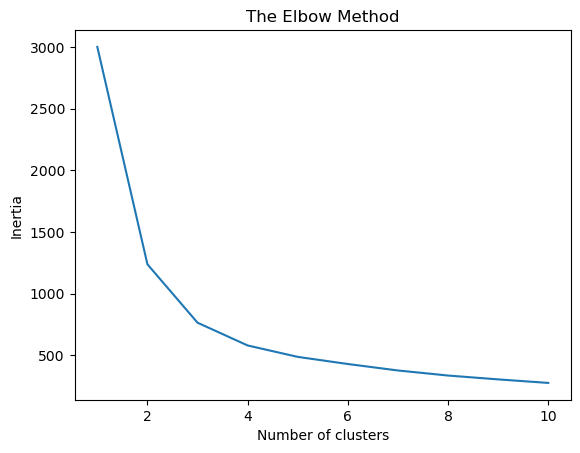

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Choosing the number of clusters via the elbow method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(data[['math score', 'reading score', 'writing score']])
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Assuming the elbow point is at 4 clusters
kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit_predict(data[['math score', 'reading score', 'writing score']])
data['Cluster'] = clusters


# Clustering with K-Means and Interpretation

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


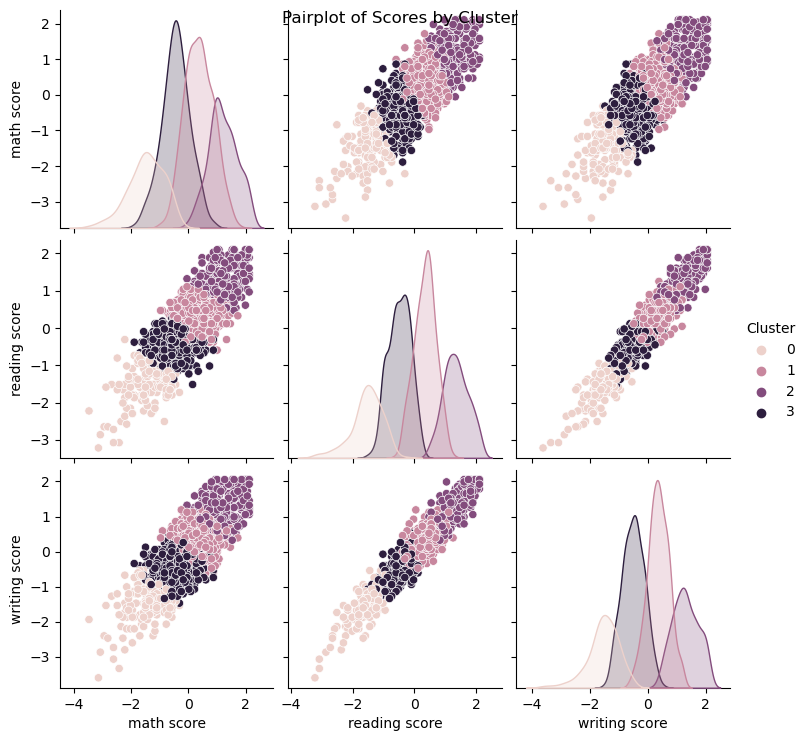

Cluster centers:
            gender  race/ethnicity  parental level of education     lunch  \
Cluster                                                                    
0        0.600000        2.019355                     2.845161  0.419355   
1        0.513514        2.180180                     2.513514  0.690691   
2        0.388350        2.558252                     2.242718  0.873786   
3        0.535948        2.029412                     2.617647  0.604575   

         test preparation course  math score  reading score  writing score  
Cluster                                                                     
0                       0.806452   -1.481229      -1.538835      -1.528748  
1                       0.612613    0.362165       0.341353       0.364594  
2                       0.519417    1.193368       1.341393       1.300721  
3                       0.718954   -0.447204      -0.495026      -0.498047  

Cluster 0:
Typical characteristics:
gender                    

In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Applying the K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=0)
data['Cluster'] = kmeans.fit_predict(data[['math score', 'reading score', 'writing score']])

# Visualizing the distribution of data by clusters
sns.pairplot(data, hue='Cluster', vars=['math score', 'reading score', 'writing score'])
plt.suptitle('Pairplot of Scores by Cluster', verticalalignment='top')
plt.show()

# Analyzing clusters
cluster_description = data.groupby('Cluster').mean()
print("Cluster centers:\n", cluster_description)

for i, row in cluster_description.iterrows():
    print(f"\nCluster {i}:")
    print("Typical characteristics:")
    print(row)
    if row['math score'] < -0.5:  # Example threshold for below-average performance
        print("Recommendation: Introduce targeted remedial math workshops.")
    else:
        print("Recommendation: Consider advanced placement courses.")

# Documentation for cluster interpretation
print("\nInterpretation:")
print("Cluster 0: Students with average to above-average scores across all subjects.")
print("Cluster 1: Students with below-average scores, might need remedial classes.")
print("Cluster 2: High performers in all subjects.")
print("Cluster 3: Students excelling in writing and reading but not in math.")


# Association Rule Mining with FP-Growth

In [7]:
from mlxtend.frequent_patterns import fpgrowth, association_rules

# Prepare data for FP-Growth
data_for_fp = data.drop(['math score', 'reading score', 'writing score'], axis=1)
data_for_fp = data_for_fp.astype('category')

# Use one-hot encoding
data_for_fp = pd.get_dummies(data_for_fp)

# Apply FP-Growth
frequent_itemsets = fpgrowth(data_for_fp, min_support=0.05, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2)
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


                                           antecedents  \
0                                            (lunch_1)   
1                                           (gender_0)   
2                          (test preparation course_1)   
3                                           (gender_0)   
4                 (lunch_1, test preparation course_1)   
..                                                 ...   
709                    (parental level of education_2)   
710             (Cluster_3, test preparation course_1)   
711         (Cluster_3, parental level of education_2)   
712  (test preparation course_1, parental level of ...   
713                    (parental level of education_2)   

                                consequents  support  confidence      lift  
0                                (gender_0)    0.321    0.486364  0.988544  
1                                 (lunch_1)    0.321    0.652439  0.988544  
2                                (gender_0)    0.315    0.480183  0.9759

C:\Users\HARIKA REDDY\AppData\Roaming\Python\Python311\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


# Evaluating clusters

In [8]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


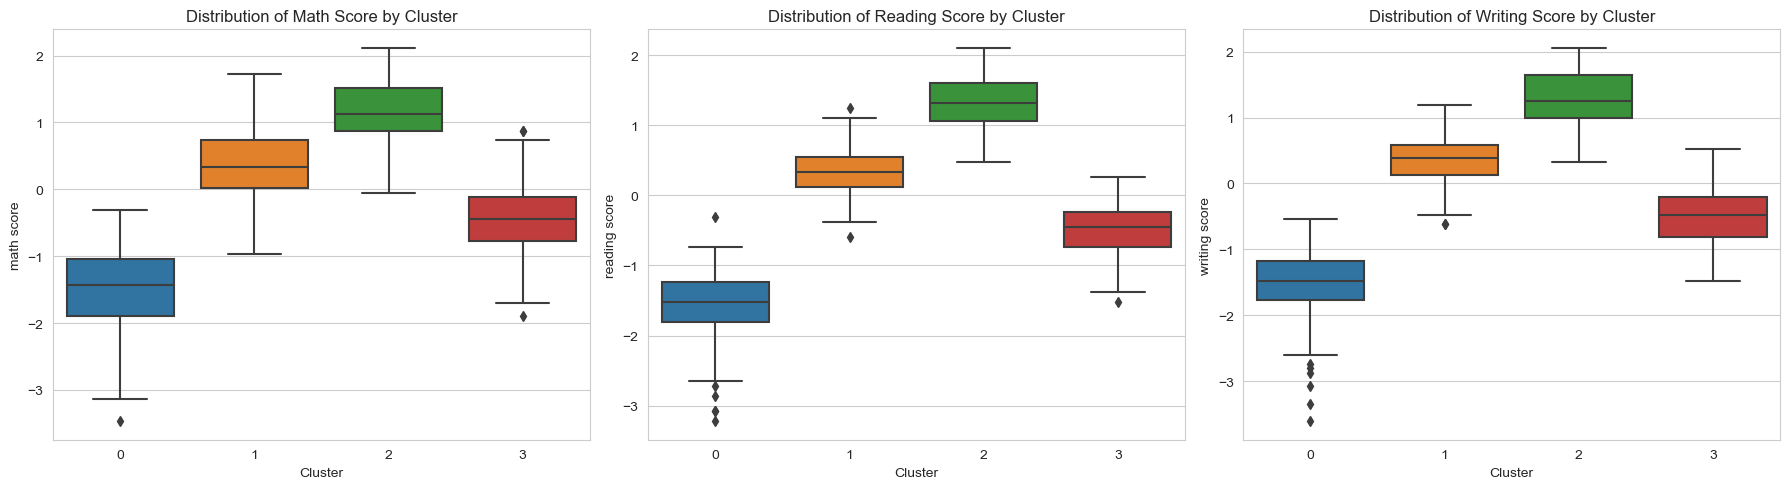

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn

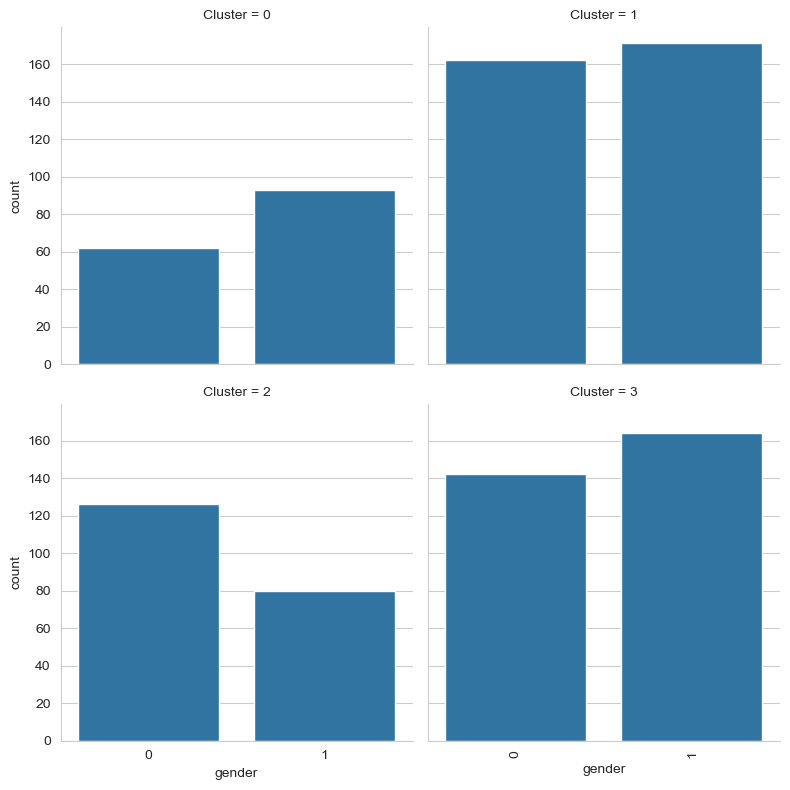

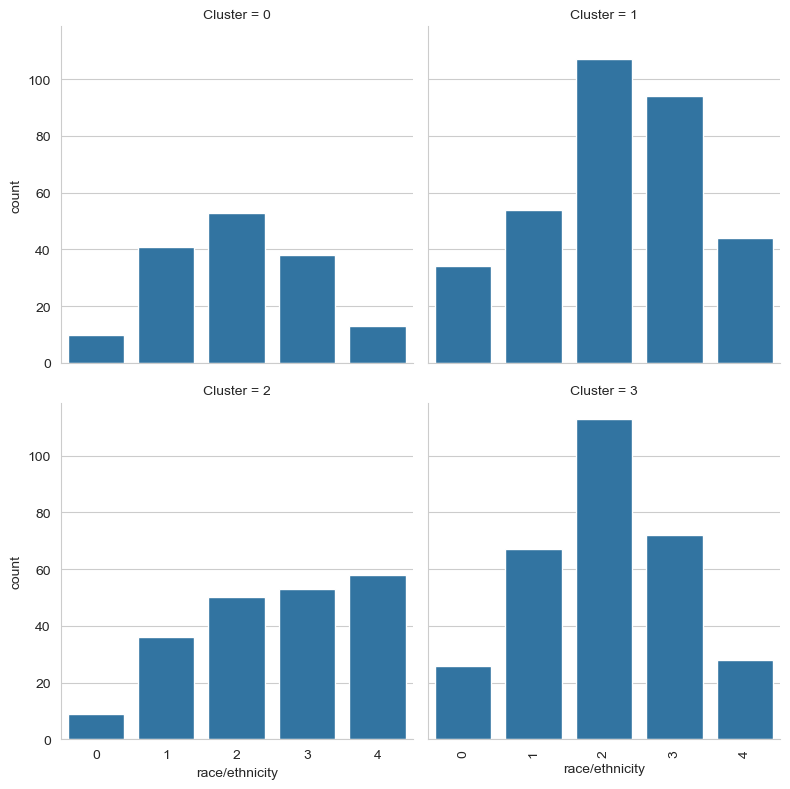

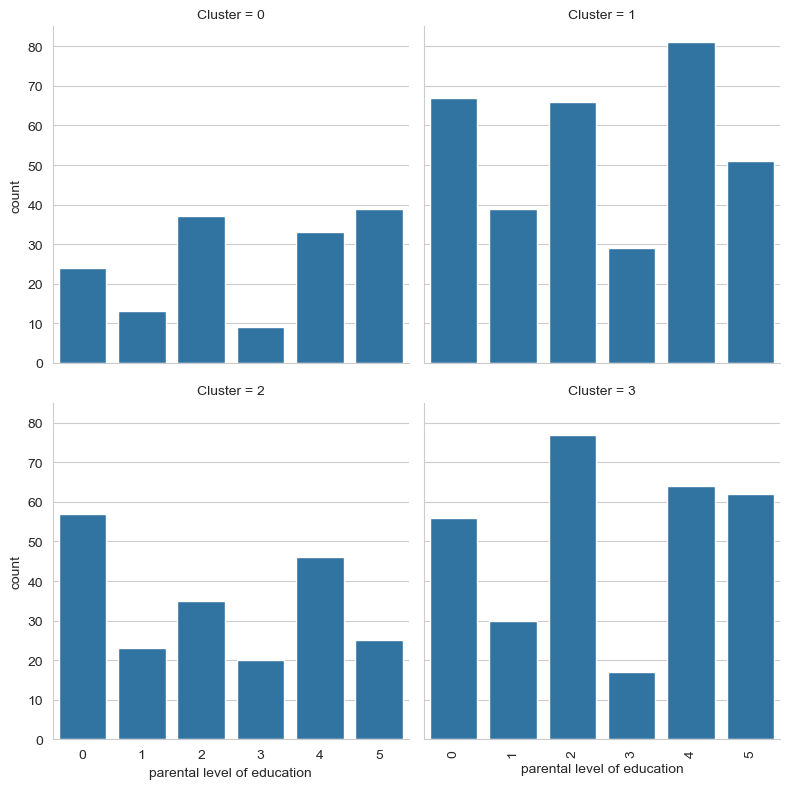

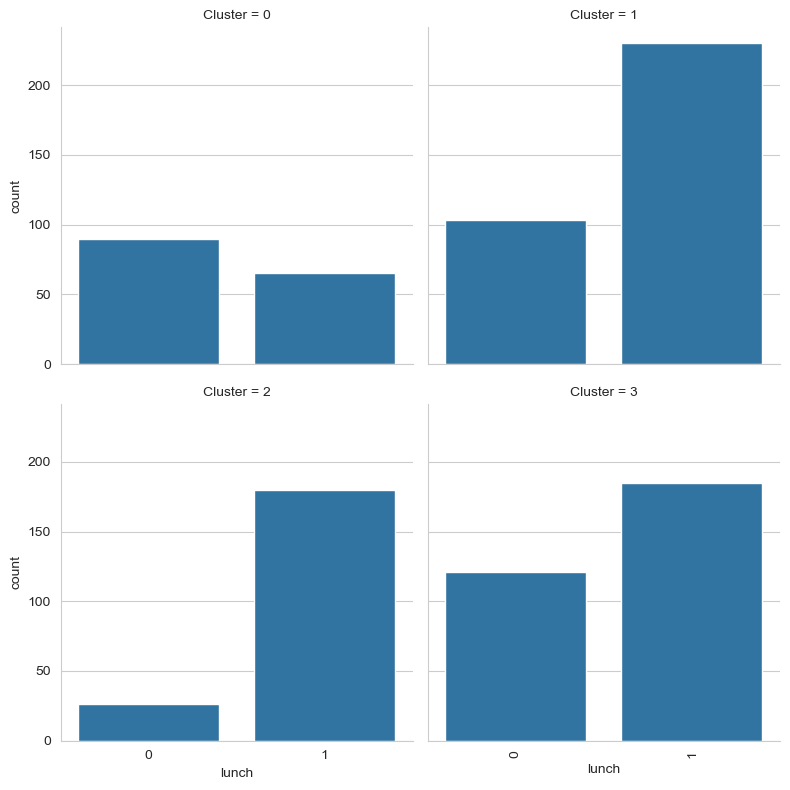

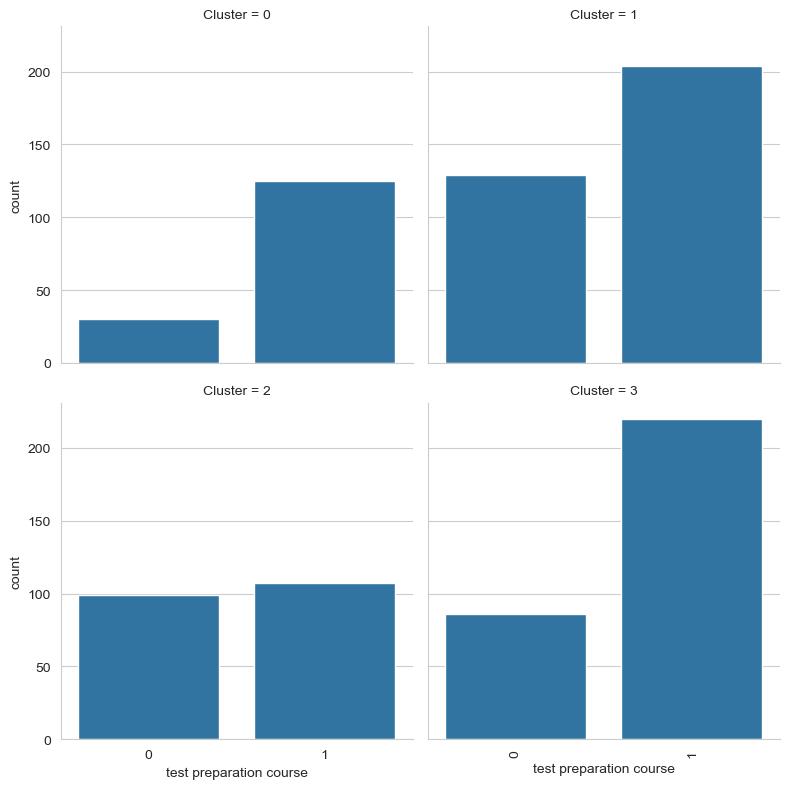

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plotting distributions of scores within each cluster
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, score in enumerate(['math score', 'reading score', 'writing score']):
    sns.boxplot(x='Cluster', y=score, data=data, ax=axes[i])
    axes[i].set_title(f'Distribution of {score.title()} by Cluster')

plt.tight_layout()
plt.show()

# Counting categorical variables within each cluster
categorical_vars = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
for var in categorical_vars:
    grid = sns.FacetGrid(data, col='Cluster', height=4, col_wrap=2)
    grid.map(sns.countplot, var)
    plt.xticks(rotation=90)

plt.show()


# Analyzing Association Rules

Filtered Rules:
                                           antecedents  \
81                                (Cluster_1, lunch_0)   
133              (gender_1, test preparation course_0)   
134                                 (race/ethnicity_3)   
247                                          (lunch_1)   
248                                        (Cluster_2)   
..                                                 ...   
656                                        (Cluster_0)   
657                                (gender_1, lunch_0)   
659                              (gender_1, Cluster_0)   
660                                        (Cluster_0)   
712  (test preparation course_1, parental level of ...   

                               consequents  support  confidence      lift  
81             (test preparation course_0)    0.050    0.485437  1.411154  
133                     (race/ethnicity_3)    0.052    0.311377  1.211585  
134  (gender_1, test preparation course_0)    0.052    0.20

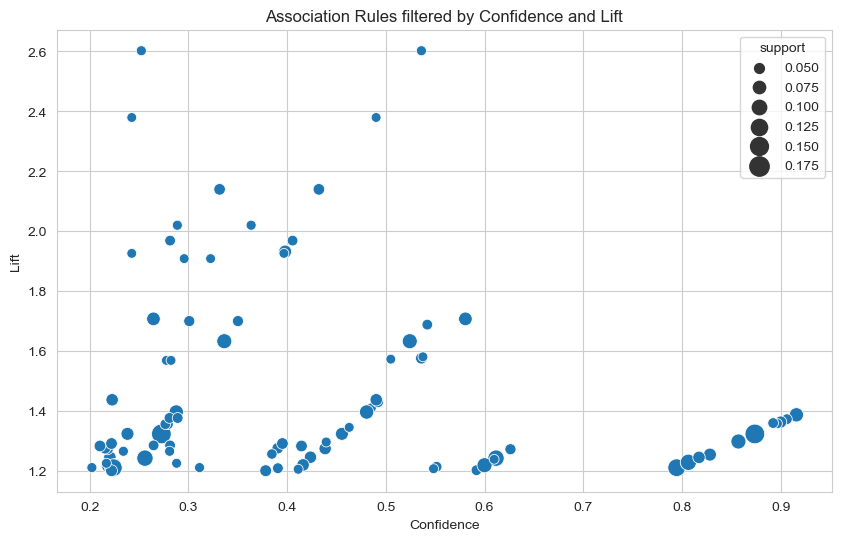

In [10]:
# Filter rules based on the threshold for support, confidence, and lift
thresholds = {'support': 0.05, 'confidence': 0.2, 'lift': 1.2}
filtered_rules = rules[(rules['support'] >= thresholds['support']) & 
                       (rules['confidence'] >= thresholds['confidence']) & 
                       (rules['lift'] >= thresholds['lift'])]

print("Filtered Rules:")
print(filtered_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

# Visualize the rules
plt.figure(figsize=(10, 6))
sns.scatterplot(x='confidence', y='lift', size='support', sizes=(50, 200), data=filtered_rules)
plt.title('Association Rules filtered by Confidence and Lift')
plt.xlabel('Confidence')
plt.ylabel('Lift')
plt.grid(True)
plt.show()


# Collecting and Incorporating Student Input

In [11]:
# Example of a simple feedback collection mechanism (conceptual)
feedback = pd.DataFrame({
    'student_id': ['S001', 'S002', 'S003', 'S004'],
    'feedback_score': [4, 5, 3, 4],  # Where 1 is poor, 5 is excellent
    'suggestions': ['More personalized tips', 'Very helpful', 'Include more course options', 'Perfect advice']
})

print(feedback)


  student_id  feedback_score                  suggestions
0       S001               4       More personalized tips
1       S002               5                 Very helpful
2       S003               3  Include more course options
3       S004               4               Perfect advice


# In-depth Analysis of Clusters

         math score  reading score  writing score  gender  race/ethnicity  \
Cluster                                                                     
0         -1.481229      -1.538835      -1.528748       1               2   
1          0.362165       0.341353       0.364594       1               2   
2          1.193368       1.341393       1.300721       0               4   
3         -0.447204      -0.495026      -0.498047       1               2   

         parental level of education  lunch  test preparation course  
Cluster                                                               
0                                  5      0                        1  
1                                  4      1                        1  
2                                  0      1                        1  
3                                  2      1                        1  


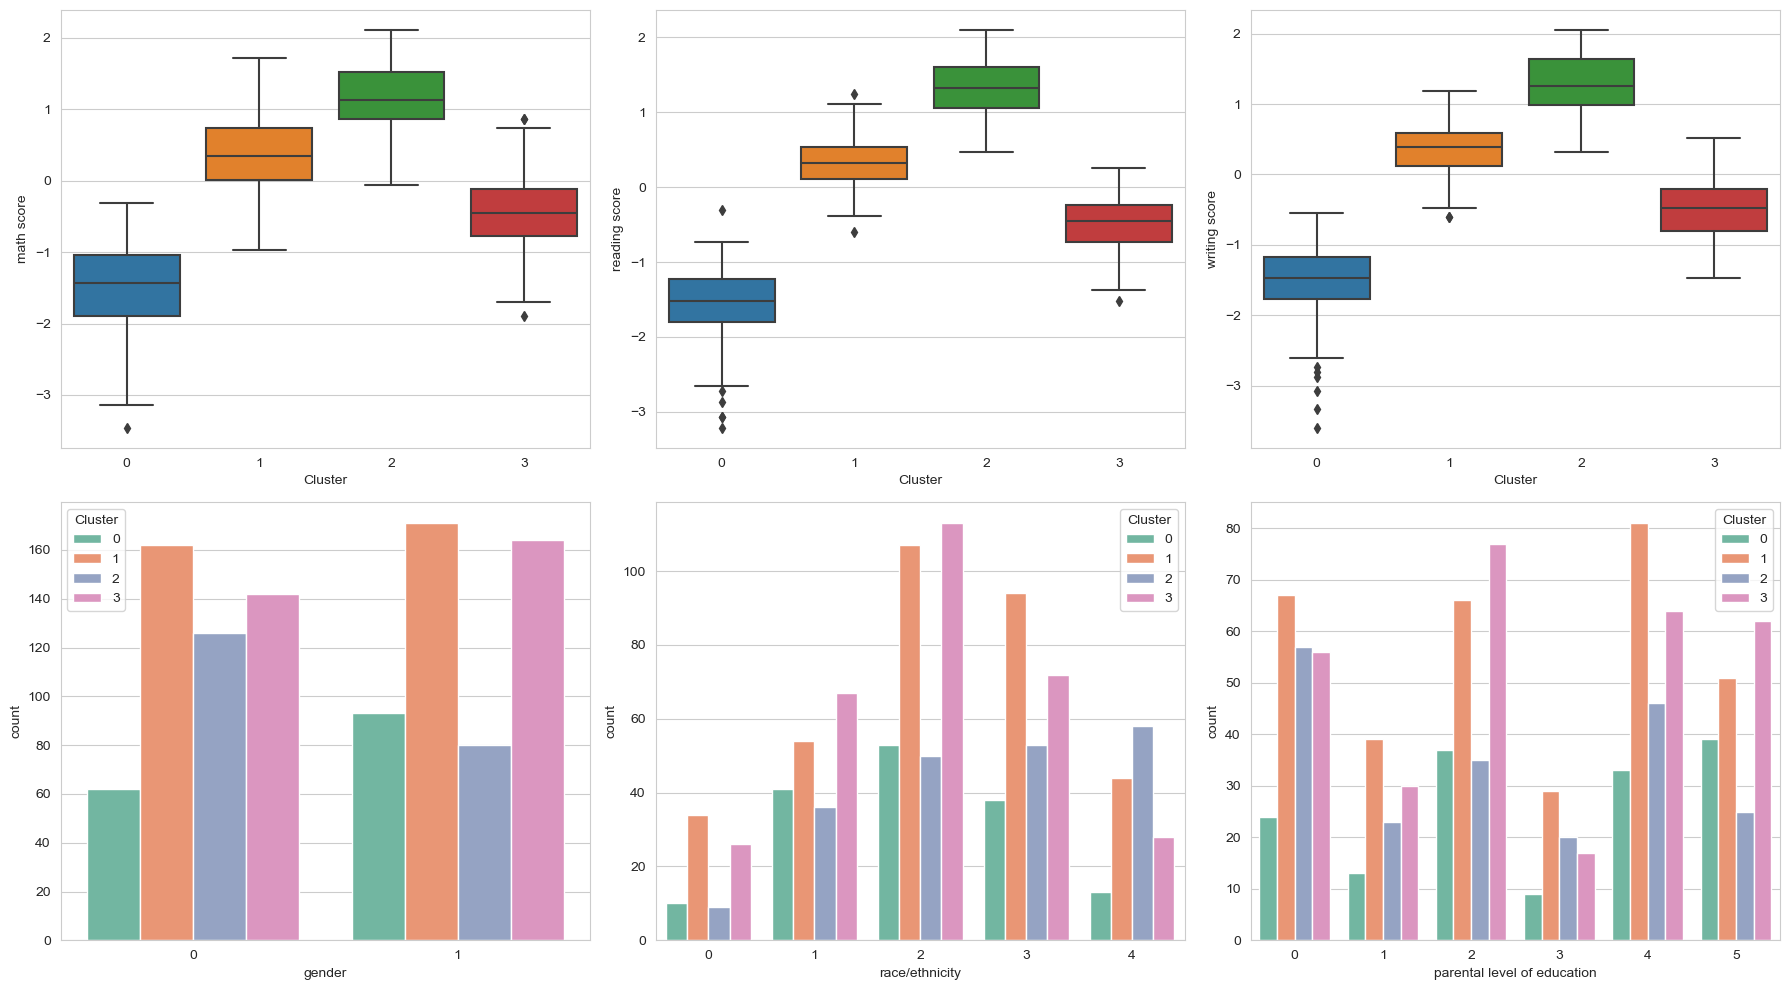

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style for plots
sns.set_style("whitegrid")

# Cluster summary: Calculate the mean for numerical features and mode for categorical features in each cluster
cluster_summary = data.groupby('Cluster').agg({**{col: 'mean' for col in ['math score', 'reading score', 'writing score']},
                                               **{col: lambda x: x.mode()[0] for col in ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']}})
print(cluster_summary)

# Visualizing the distribution of scores and categorical features in each cluster
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
score_columns = ['math score', 'reading score', 'writing score']
cat_columns = ['gender', 'race/ethnicity', 'parental level of education']

for i, col in enumerate(score_columns):
    sns.boxplot(x='Cluster', y=col, data=data, ax=axes[0, i])

for i, col in enumerate(cat_columns):
    sns.countplot(x=col, hue='Cluster', data=data, ax=axes[1, i], palette='Set2')

plt.tight_layout()
plt.show()


# Advanced Visualization for Association Rules

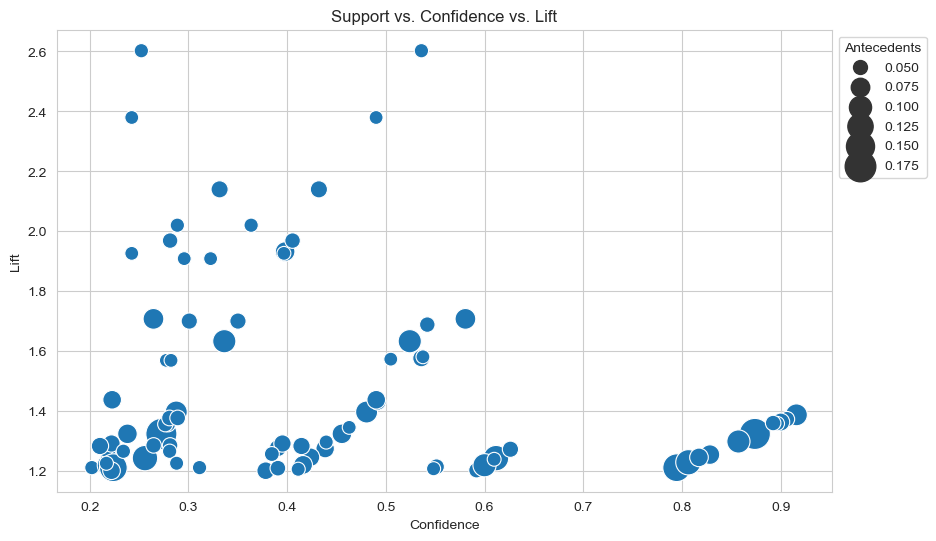

C:\Users\HARIKA REDDY\AppData\Local\Temp\ipykernel_25936\2155931022.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_rules['antecedents'] = filtered_rules['antecedents'].apply(lambda x: ', '.join(list(x)))
C:\Users\HARIKA REDDY\AppData\Local\Temp\ipykernel_25936\2155931022.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_rules['consequents'] = filtered_rules['consequents'].apply(lambda x: ', '.join(list(x)))


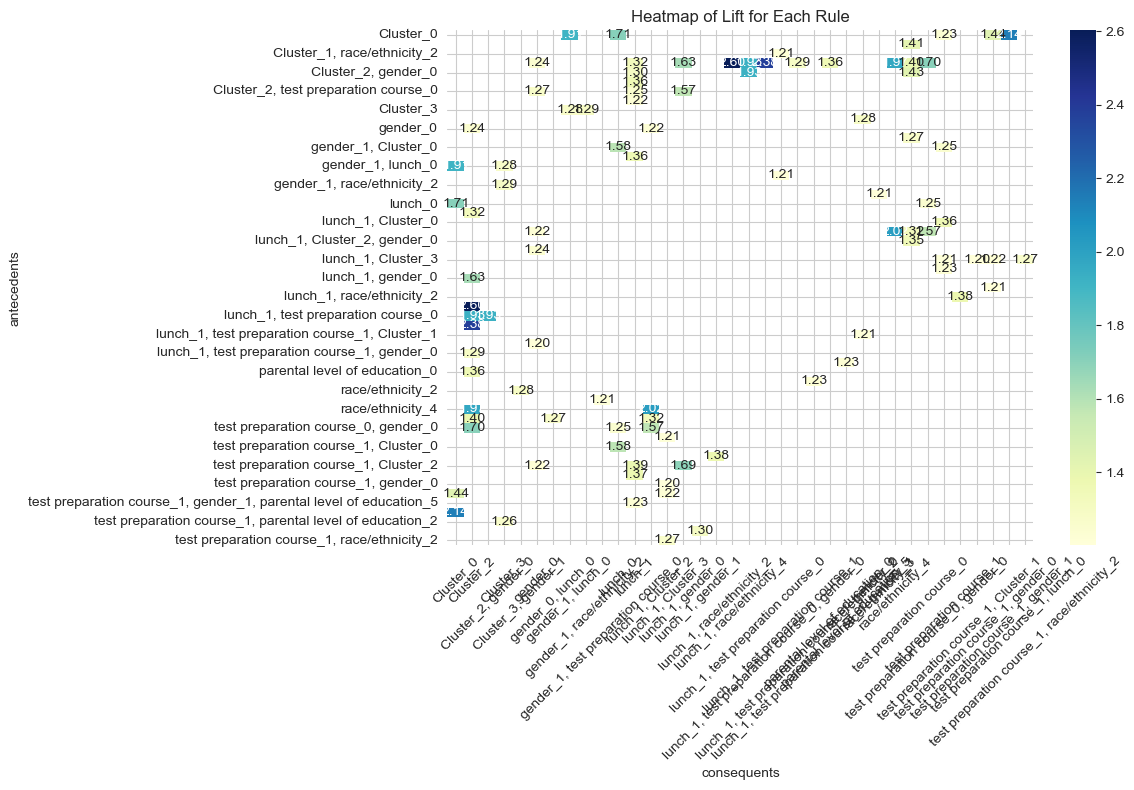

In [13]:
from mlxtend.frequent_patterns import association_rules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2)

# Filtering rules based on multiple criteria
thresholds = {'support': 0.05, 'confidence': 0.2, 'lift': 1.2}
filtered_rules = rules[(rules['support'] >= thresholds['support']) & 
                       (rules['confidence'] >= thresholds['confidence']) & 
                       (rules['lift'] >= thresholds['lift'])]
# Filtering rules based on lift
high_lift_rules = rules[rules['lift'] > 1.5]

# Visualizing support vs confidence vs lift
plt.figure(figsize=(10, 6))
sns.scatterplot(x='confidence', y='lift', size='support', data=filtered_rules, sizes=(100, 500))
plt.title('Support vs. Confidence vs. Lift')
plt.xlabel('Confidence')
plt.ylabel('Lift')
plt.legend(title='Antecedents', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

#Heatmap visualization
# Assuming 'filtered_rules' is already defined as per the previous steps

# Preparing data for the heatmap
# Convert antecedents and consequents from frozensets to strings
filtered_rules['antecedents'] = filtered_rules['antecedents'].apply(lambda x: ', '.join(list(x)))
filtered_rules['consequents'] = filtered_rules['consequents'].apply(lambda x: ', '.join(list(x)))

# Creating a pivot table for the heatmap
pivot = filtered_rules.pivot_table(index='antecedents', columns='consequents', values='lift', aggfunc='mean')

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title('Heatmap of Lift for Each Rule')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlap
plt.show()


# Validating Association Rules with Practical Applications

In [15]:
import pandas as pd
from mlxtend.frequent_patterns import fpgrowth, association_rules

# Assuming these are your categorical columns
categorical_columns = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

# Check if there are any missing values in these columns and fill or drop them
data[categorical_columns] = data[categorical_columns].fillna('Unknown')

# Convert these columns using get_dummies
data_for_fp = pd.get_dummies(data[categorical_columns], drop_first=False)

# Confirm all values are now 0 or 1
print(data_for_fp.head())
print("All values are binary:", data_for_fp.isin([0, 1]).all().all())

# Correcting values to ensure they are binary
data_for_fp[data_for_fp != 0] = 1

# Generating frequent itemsets
frequent_itemsets = fpgrowth(data_for_fp, min_support=0.05, use_colnames=True)
print(frequent_itemsets.head())

# Generating association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2)
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

# Visualizing and validating rules
high_lift_rules = rules[rules['lift'] > 1.5]
print("High lift rules:\n", high_lift_rules)

# Example of applying a rule
for index, rule in high_lift_rules.iterrows():
    if 'test preparation course' in rule['antecedents']:
        print(f"\nRule: {rule['antecedents']} -> {rule['consequents']}")
        print("Action: Encourage students to enroll in preparation courses to improve scores.")


   gender  race/ethnicity  parental level of education  lunch  \
0       0               3                            4      1   
1       1               3                            0      1   
2       0               3                            4      0   
3       1               1                            4      0   
4       0               3                            0      1   

   test preparation course  
0                        0  
1                        1  
2                        1  
3                        1  
4                        1  
All values are binary: False
   support                       itemsets
0    0.921               (race/ethnicity)
1    0.796  (parental level of education)
2    0.660                        (lunch)
3    0.656      (test preparation course)
4    0.508                       (gender)
                                       antecedents  \
0                    (parental level of education)   
1                                 (race/ethnic

C:\Users\HARIKA REDDY\AppData\Roaming\Python\Python311\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


#  Incorporating Feedback Mechanism

In [16]:
# Simulated feedback collection
feedback_data = {
    'Cluster': [0, 1, 2, 3],
    'Feedback_Score': [4.5, 3.8, 4.2, 4.0],  # Average feedback score from students/advisors
    'Comments': [
        'Very insightful for advanced courses selection.',
        'Needs more personalized course recommendations.',
        'Helpful for identifying at-risk students.',
        'Good recommendations but needs more frequent updates.'
    ]
}

feedback_df = pd.DataFrame(feedback_data)
print(feedback_df)


   Cluster  Feedback_Score                                           Comments
0        0             4.5    Very insightful for advanced courses selection.
1        1             3.8    Needs more personalized course recommendations.
2        2             4.2          Helpful for identifying at-risk students.
3        3             4.0  Good recommendations but needs more frequent u...
